## ODE base simulation

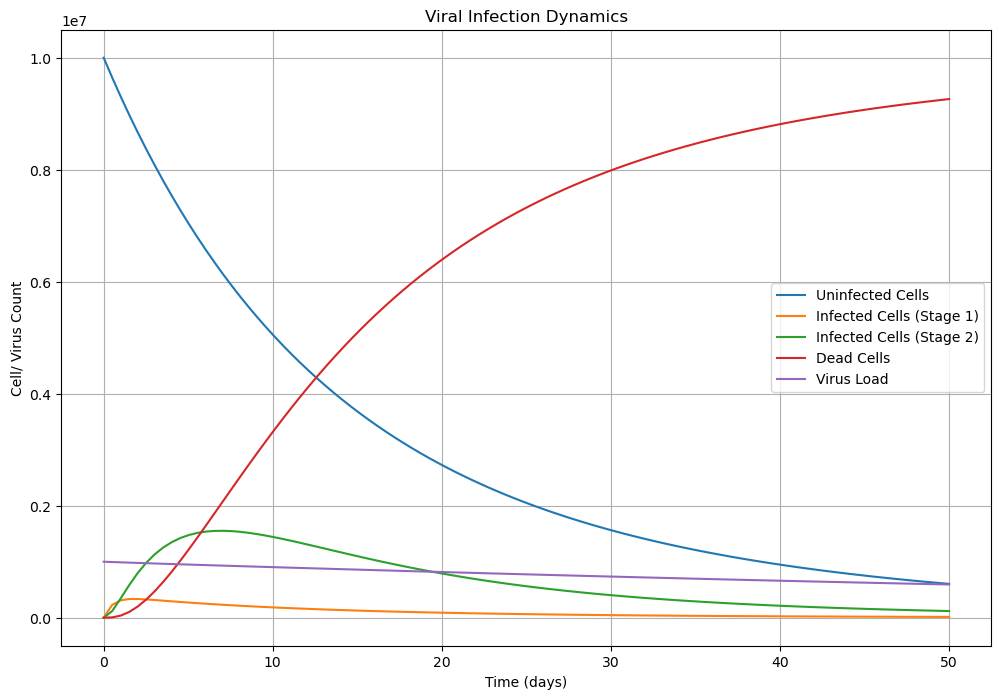

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def viral_infection_model(y, t, beta, k, d, p, c):
    U, I1, I2, A, V = y
    dU_dt = -beta * U * V
    dI1_dt = beta * U * V - k * I1
    dI2_dt = k * I1 - d * I2
    dA_dt = d * I2
    dV_dt = p * I2 - c * V
    return [dU_dt, dI1_dt, dI2_dt, dA_dt, dV_dt]

# Parameters
beta = 7.18e-8  # infection rate
k = 1.85      # infected_to_transitioning_conv_rate
d = 2.78e-1      # death rate
p = 5.79e-4      # virus production rate
c = 1.09e-2      # virus decay rate

# Initial conditions
U0 = 1e7  # initial uninfected cells
I1_0 = 0  # initial infected cells stage 1
I2_0 = 0  # initial infected cells stage 2
A0 = 0    # initial dead cells
V0 = 1e6  # initial virus load

# Time points (days)
t = np.linspace(0, 50, 100)  # simulate for 50 days

# Initial state
y0 = [U0, I1_0, I2_0, A0, V0]

# Solve ODE
solution = odeint(viral_infection_model, y0, t, args=(beta, k, d, p, c))

# Plot results
U, I1, I2, A, V = solution.T
plt.figure(figsize=(12, 8))
plt.plot(t, U, label='Uninfected Cells')
plt.plot(t, I1, label='Infected Cells (Stage 1)')
plt.plot(t, I2, label='Infected Cells (Stage 2)')
plt.plot(t, A, label='Dead Cells')
plt.plot(t, V, label='Virus Load')
plt.xlabel('Time (days)')
plt.ylabel('Cell/ Virus Count')
plt.legend()
plt.title('Viral Infection Dynamics')
plt.grid()
plt.show()

## Added spatial diffusion term simulation

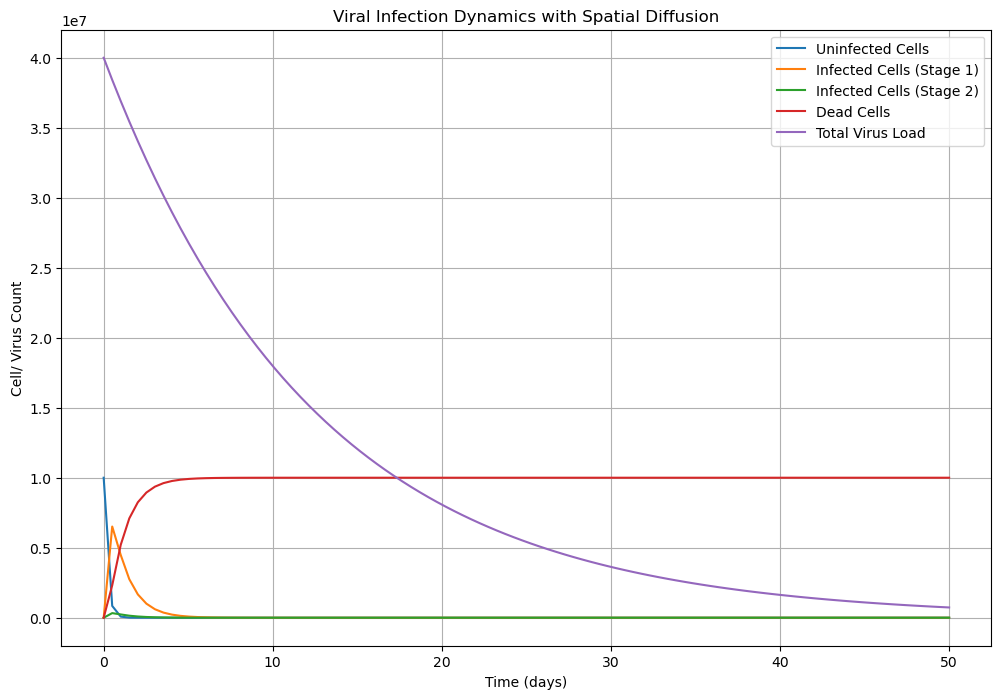

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system with diffusion for virus
def viral_infection_model(y, t, beta, k, d, p, c, D, grid_size, dx):
    # Separate the variables
    U, I1, I2, A = y[:4]
    V_flat = np.array(y[4:])  # Virus concentration, flattened array
    
    # Reshape the flattened virus array for spatial diffusion
    V = V_flat.reshape((grid_size, grid_size))
    
    # Spatial diffusion using finite differences
    V_diffused = V.copy()
    V_diffused[1:-1, 1:-1] += D * (
        (V[:-2, 1:-1] + V[2:, 1:-1] + V[1:-1, :-2] + V[1:-1, 2:] - 4 * V[1:-1, 1:-1]) / dx**2
    )
    
    # Flatten the diffused virus array back for ODE system
    V_diffused_flat = V_diffused.flatten()
    
    # Reaction dynamics
    dU_dt = -beta * U * V_diffused_flat.mean()
    dI1_dt = beta * U * V_diffused_flat.mean() - k * I1
    dI2_dt = k * I1 - d * I2
    dA_dt = d * I2
    dV_dt_flat = p * I2 - c * V_diffused_flat
    
    # Return the derivatives in a flattened list format
    return [dU_dt, dI1_dt, dI2_dt, dA_dt] + dV_dt_flat.tolist()

# Parameters
beta = 5.0e-5     # Adjusted infection rate
k = 1.0           # Adjusted infected_to_transitioning_conv_rate
d = 20           # Adjusted death rate
p = 5.0e-5        # Lower virus production rate
c = 8.0e-2        # Higher virus decay rate
D = 0.5           # Adjusted virus diffusion coefficient
grid_size = 20    # Increased grid size for better spatial resolution
dx = 1.0          # Spatial step size remains the same

# Initial conditions
U0 = 1e7                           # initial uninfected cells
I1_0 = 0                           # initial infected cells stage 1
I2_0 = 0                           # initial infected cells stage 2
A0 = 0                             # initial dead cells
V0 = np.ones((grid_size, grid_size)) * 1e5  # initial virus load in grid

# Flatten the initial virus load array for ODE solver
V0_flat = V0.flatten()
y0 = [U0, I1_0, I2_0, A0] + V0_flat.tolist()

# Time points (days)
t = np.linspace(0, 50, 100)

# Solve ODE with spatial diffusion for virus
solution = odeint(viral_infection_model, y0, t, args=(beta, k, d, p, c, D, grid_size, dx))

# Extract solutions
U = solution[:, 0]
I1 = solution[:, 1]
I2 = solution[:, 2]
A = solution[:, 3]
V_total = solution[:, 4:].sum(axis=1)  # Summing virus concentration over the grid

# Plot results (time series)
plt.figure(figsize=(12, 8))
plt.plot(t, U, label='Uninfected Cells')
plt.plot(t, I1, label='Infected Cells (Stage 1)')
plt.plot(t, I2, label='Infected Cells (Stage 2)')
plt.plot(t, A, label='Dead Cells')
plt.plot(t, V_total, label='Total Virus Load')
plt.xlabel('Time (days)')
plt.ylabel('Cell/ Virus Count')
plt.legend()
plt.title('Viral Infection Dynamics with Spatial Diffusion')
plt.grid()
plt.show()